In [260]:
!pip install -q yfinance

In [261]:
def fetch_stock_data(tickers, years=1):
    end = datetime.now()
    start = datetime(end.year - years, end.month, end.day)
    try:
        data = yf.download(tickers, start=start, end=end, group_by='ticker')
        if data.empty:
            raise ValueError("No data downloaded. Check tickers or date range.")
        for ticker in tickers:
            if ticker not in data.columns.get_level_values(0):
                print(f"Warning: No data for {ticker}")
        df = data.stack(level=0, future_stack=True).rename_axis(['Date', 'Ticker']).reset_index()
        return df
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None

In [262]:
df.tail()

Price,Date,Ticker,Open,High,Low,Close,Volume,Return
1716,2025-09-10,TSLA,350.549988,356.329987,346.070007,347.790009,72121700,0.002363
1723,2025-09-11,TSLA,350.170013,368.989990,347.600006,368.809998,103756000,0.060439
1730,2025-09-12,TSLA,370.940002,396.690002,370.239990,395.940002,168156400,0.073561
1737,2025-09-15,TSLA,423.130005,425.700012,402.429993,410.040009,163823700,0.035611
1744,2025-09-16,TSLA,414.500000,423.250000,411.429993,421.619995,103769900,0.028241


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1743 entries, 13 to 1744
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1743 non-null   datetime64[ns]
 1   Ticker  1743 non-null   object        
 2   Open    1743 non-null   float64       
 3   High    1743 non-null   float64       
 4   Low     1743 non-null   float64       
 5   Close   1743 non-null   float64       
 6   Volume  1743 non-null   int64         
 7   Return  1743 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 122.6+ KB


In [264]:
df.isna().sum()

,0
Price,
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
Return,0


**EDA**

In [265]:
df.groupby("Ticker")["Close"].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,249.0,222.343923,16.300196,171.998978,209.771927,225.420898,233.911362,258.103729
AMZN,249.0,210.202330,17.824820,167.320007,193.960007,212.100006,225.940002,242.059998
GOOG,249.0,180.132589,19.277261,146.273285,166.013428,175.720932,192.685974,251.759995
META,249.0,640.628460,73.464016,484.287384,583.340454,622.466858,704.280029,790.000000
MSFT,249.0,440.347529,45.080615,353.329437,410.613739,428.177216,478.084076,534.760925
NVDA,249.0,139.224014,22.074794,94.298134,121.654694,137.362717,147.587677,183.149673
TSLA,249.0,318.825622,59.374970,213.649994,268.459991,322.269989,350.000000,479.859985


**Visualization**

**What was the highest and lowest closing price of each stock in the last year?**

               min         max
Ticker                        
AAPL    171.998978  258.103729
AMZN    167.320007  242.059998
GOOG    146.273285  251.759995
META    484.287384  790.000000
MSFT    353.329437  534.760925
NVDA     94.298134  183.149673
TSLA    213.649994  479.859985


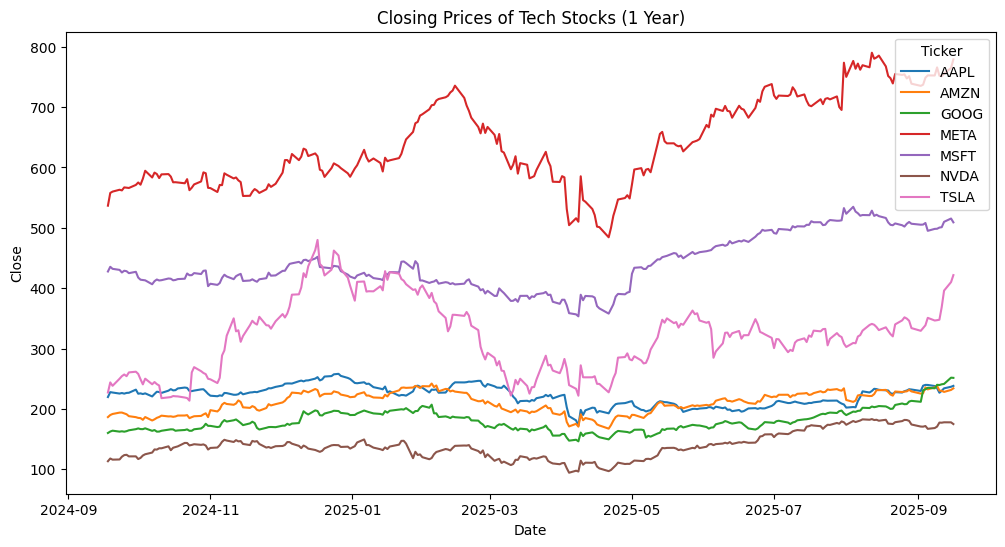

In [266]:
high_low = df.groupby("Ticker")["Close"].agg(["min", "max"])
print(high_low)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Close", hue="Ticker", data=df)
plt.title("Closing Prices of Tech Stocks (1 Year)")
plt.show()


**Which stock was traded the most (highest volume)?**

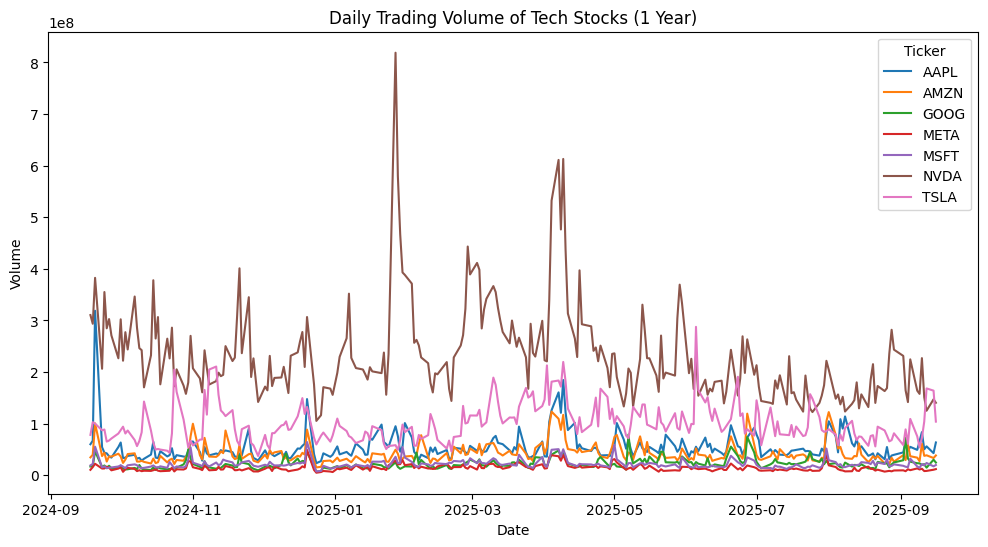

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Volume", hue="Ticker", data=df)
plt.title("Daily Trading Volume of Tech Stocks (1 Year)")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.show()


**How correlated are the returns between the different stocks?**

In [268]:
df["Return"] = df.groupby("Ticker")["Close"].pct_change()

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1743 entries, 13 to 1744
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1743 non-null   datetime64[ns]
 1   Ticker  1743 non-null   object        
 2   Open    1743 non-null   float64       
 3   High    1743 non-null   float64       
 4   Low     1743 non-null   float64       
 5   Close   1743 non-null   float64       
 6   Volume  1743 non-null   int64         
 7   Return  1736 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 122.6+ KB


In [270]:
df.isna().sum()

,0
Price,
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
Return,7


In [271]:
df.dropna(inplace=True)
df.shape

(1736, 8)

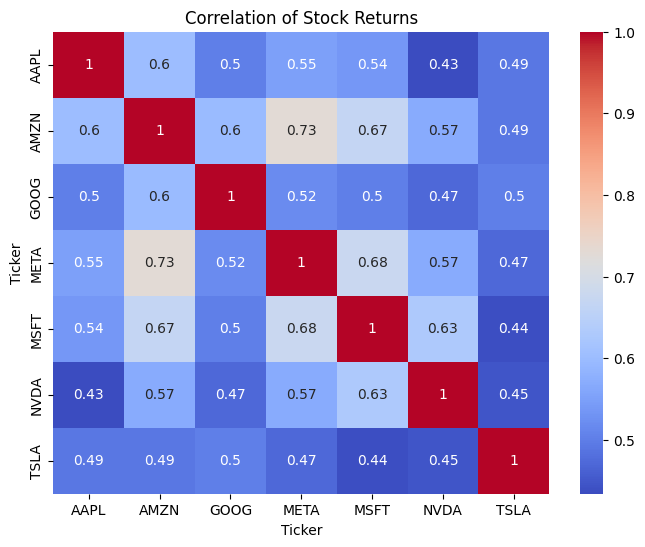

In [272]:
returns = df.pivot(index="Date", columns="Ticker", values="Return")
corr = returns.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Stock Returns")
plt.show()


**Which stock performed best overall in terms of price growth?**

Price Growth (%) from start to end period:

Ticker
TSLA    72.851754
GOOG    54.692705
NVDA    48.409391
META    39.674913
AMZN    23.268557
MSFT    16.907525
AAPL     4.538974
Name: Close, dtype: float64


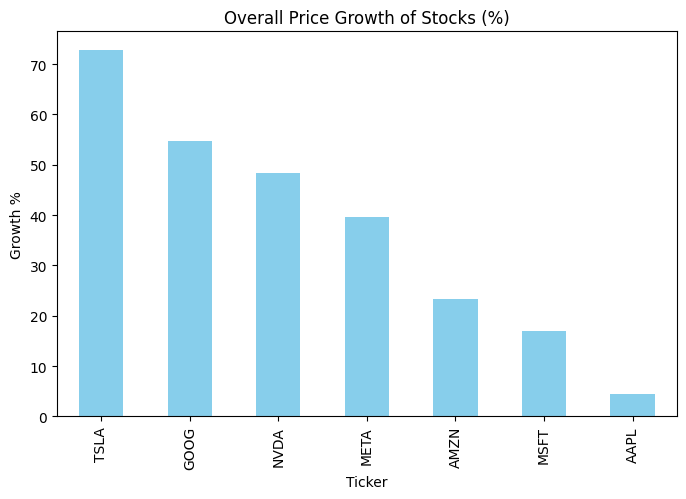

In [273]:
growth = df.groupby("Ticker")["Close"].agg(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)
growth = growth.sort_values(ascending=False)

print("Price Growth (%) from start to end period:\n")
print(growth)
growth.plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("Overall Price Growth of Stocks (%)")
plt.ylabel("Growth %")
plt.xlabel("Ticker")
plt.show()


**On average, which stock provided the highest (or lowest) daily return over the past year?**

Average Daily Return (per stock):

Ticker
AAPL    0.000532
AMZN    0.001142
GOOG    0.002021
META    0.001766
MSFT    0.000824
NVDA    0.002243
TSLA    0.003483
Name: Return, dtype: float64


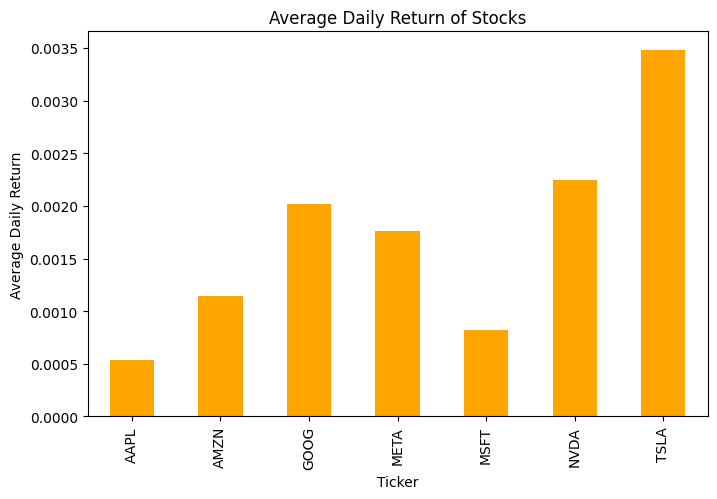

In [274]:
avg_daily_return = df.groupby("Ticker")["Return"].mean()
print("Average Daily Return (per stock):\n")
print(avg_daily_return)
avg_daily_return.plot(kind="bar", figsize=(8,5), color="orange")
plt.title("Average Daily Return of Stocks")
plt.ylabel("Average Daily Return")
plt.xlabel("Ticker")
plt.show()


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1736 entries, 20 to 1744
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1736 non-null   datetime64[ns]
 1   Ticker  1736 non-null   object        
 2   Open    1736 non-null   float64       
 3   High    1736 non-null   float64       
 4   Low     1736 non-null   float64       
 5   Close   1736 non-null   float64       
 6   Volume  1736 non-null   int64         
 7   Return  1736 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 122.1+ KB


**Which stock had the highest cumulative return over the period?**

Cumulative Return (per stock):

Ticker
AAPL    0.045390
AMZN    0.232686
GOOG    0.546927
META    0.396749
MSFT    0.169075
NVDA    0.484094
TSLA    0.728518
Name: Cumulative Return, dtype: float64


/tmp/ipython-input-4235609517.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cumulative_return = df.groupby("Ticker").apply(


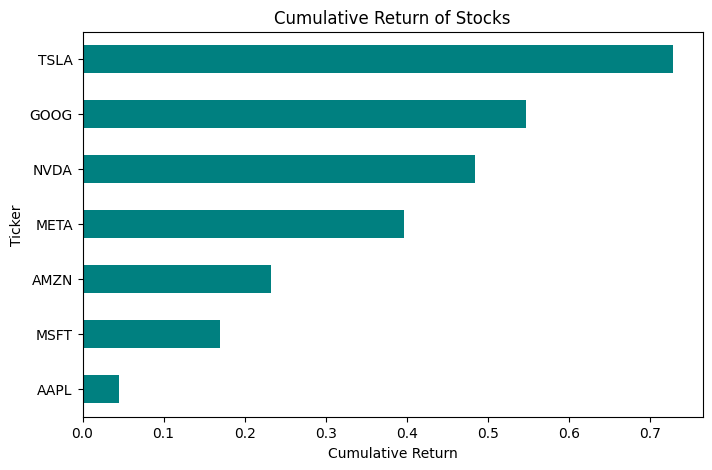

In [276]:
cumulative_return = df.groupby("Ticker").apply(
    lambda x: (x["Close"].iloc[-1] / x["Close"].iloc[0]) - 1
).rename("Cumulative Return")

print("Cumulative Return (per stock):\n")
print(cumulative_return)
cumulative_return.sort_values().plot(kind="barh", figsize=(8,5), color="teal")
plt.title("Cumulative Return of Stocks")
plt.xlabel("Cumulative Return")
plt.show()


**Which stock was the most volatile (highest standard deviation of returns)?**

In [277]:
import pandas as pd
df = df.sort_values(by=["Ticker", "Date"])
volatility = df.groupby("Ticker")["Return"].std().reset_index()
volatility.columns = ["Ticker", "Volatility"]
most_volatile = volatility.loc[volatility["Volatility"].idxmax()]

print("Volatility per stock:\n", volatility)
print("\nMost volatile stock:\n", most_volatile)


Volatility per stock:
   Ticker  Volatility
0   AAPL    0.020459
1   AMZN    0.021242
2   GOOG    0.020057
3   META    0.023111
4   MSFT    0.015654
5   NVDA    0.031374
6   TSLA    0.044975

Most volatile stock:
 Ticker            TSLA
Volatility    0.044975
Name: 6, dtype: object


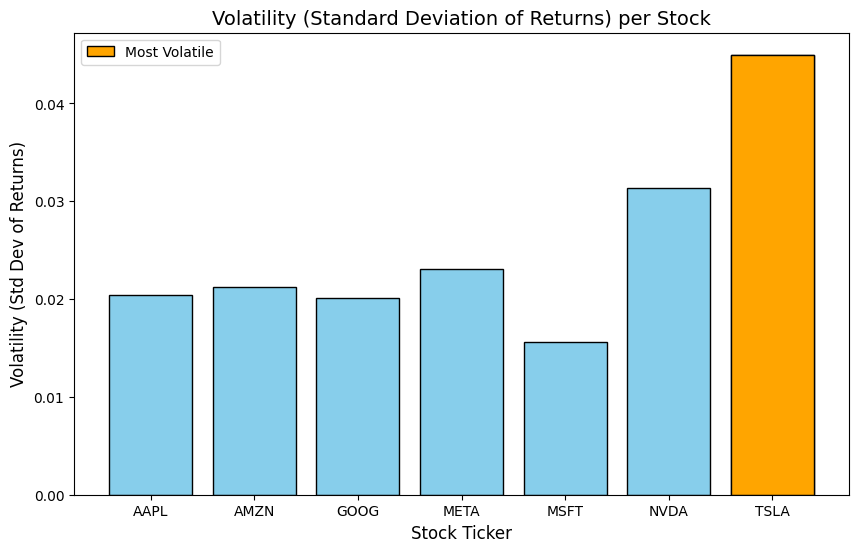

In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(volatility["Ticker"], volatility["Volatility"], color="skyblue", edgecolor="black")

plt.title("Volatility (Standard Deviation of Returns) per Stock", fontsize=14)
plt.xlabel("Stock Ticker", fontsize=12)
plt.ylabel("Volatility (Std Dev of Returns)", fontsize=12)
most_vol = volatility.loc[volatility["Volatility"].idxmax()]
plt.bar(most_vol["Ticker"], most_vol["Volatility"], color="orange", edgecolor="black", label="Most Volatile")

plt.legend()
plt.show()


**Which stock had the best risk-adjusted return (Sharpe Ratio)?**

In [279]:
stats = df.groupby("Ticker")["Return"].agg(["mean", "std"]).reset_index()
stats["Sharpe_Ratio"] = stats["mean"] / stats["std"]
best_sharpe = stats.loc[stats["Sharpe_Ratio"].idxmax()]

print("Risk-adjusted returns (Sharpe Ratio):\n", stats)
print("\nStock with best Sharpe Ratio:\n", best_sharpe)


Risk-adjusted returns (Sharpe Ratio):
   Ticker      mean       std  Sharpe_Ratio
0   AAPL  0.000532  0.020459      0.025990
1   AMZN  0.001142  0.021242      0.053741
2   GOOG  0.002021  0.020057      0.100745
3   META  0.001766  0.023111      0.076395
4   MSFT  0.000824  0.015654      0.052645
5   NVDA  0.002243  0.031374      0.071494
6   TSLA  0.003483  0.044975      0.077440

Stock with best Sharpe Ratio:
 Ticker              GOOG
mean            0.002021
std             0.020057
Sharpe_Ratio    0.100745
Name: 2, dtype: object


In [280]:
df.isna().sum()

,0
Price,
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
Return,0


**Were there any unusual spikes in trading volume?**



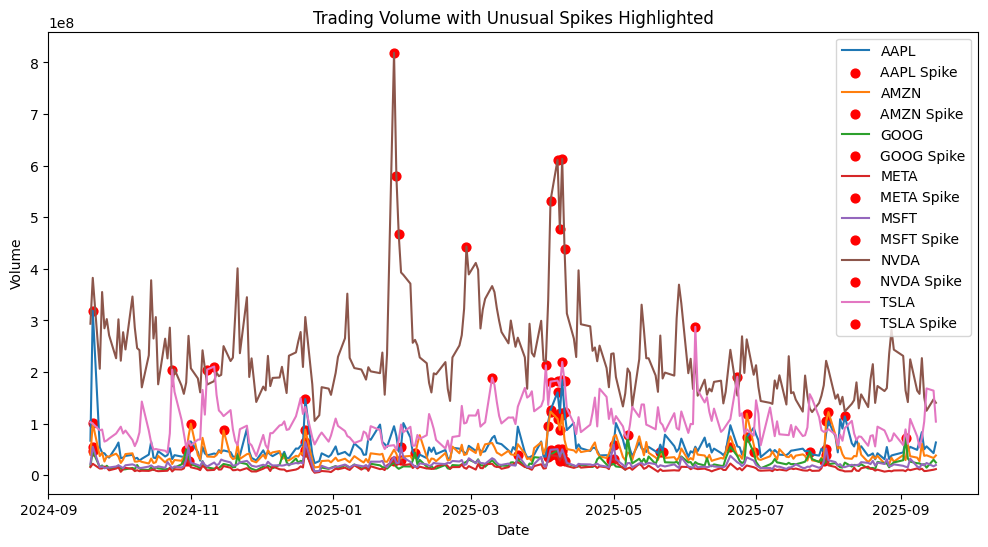

In [281]:
import matplotlib.pyplot as plt

thresholds = df.groupby("Ticker")["Volume"].transform(lambda x: x.mean() + 2*x.std())
spikes = df[df["Volume"] > thresholds]
plt.figure(figsize=(12,6))
for ticker in df["Ticker"].unique():
    subset = df[df["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Volume"], label=ticker)
    plt.scatter(spikes[spikes["Ticker"] == ticker]["Date"],
                spikes[spikes["Ticker"] == ticker]["Volume"],
                color="red", marker="o", s=40, label=f"{ticker} Spike")

plt.title("Trading Volume with Unusual Spikes Highlighted")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


**Feature Engineering**

In [282]:
import pandas as pd
import numpy as np

def feature_engineering(df):
    df_feat = df.copy()
    df_feat["Date"] = pd.to_datetime(df_feat["Date"])
    df_feat = df_feat.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)
    df_feat["Daily_Return"] = df_feat.groupby("Ticker")["Close"].pct_change()
    df_feat = df_feat.dropna(subset=["Daily_Return"])
    df_feat["Daily_Range"] = df_feat["High"] - df_feat["Low"]
    df_feat["Open_Close_Diff"] = df_feat["Close"] - df_feat["Open"]
    df_feat["Cum_Return"] = df_feat.groupby("Ticker")["Daily_Return"].transform(
        lambda x: (1 + x).cumprod() - 1
    )

    for lag in [1, 2, 5]:
        df_feat[f"Lag{lag}_Return"] = df_feat.groupby("Ticker")["Daily_Return"].shift(lag)
    df_feat["Lag1_Close"] = df_feat.groupby("Ticker")["Close"].shift(1)
    for window in [5, 10, 20, 50]:
        df_feat[f"SMA_{window}"] = (
            df_feat.groupby("Ticker")["Close"]
            .transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).mean())
        )
        df_feat[f"Close_vs_SMA_{window}_Diff"] = df_feat["Close"] - df_feat[f"SMA_{window}"]
    for window in [5, 20]:
        df_feat[f"Volatility_{window}d"] = (
            df_feat.groupby("Ticker")["Daily_Return"]
            .transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).std())
        )

    df_feat["Volume_Change_Pct"] = df_feat.groupby("Ticker")["Volume"].pct_change()
    initial_rows = len(df_feat)
    df_feat = df_feat.dropna().reset_index(drop=True)
    final_rows = len(df_feat)
    print(f"Dropped {initial_rows - final_rows} rows due to NaNs after feature engineering.")

    return df_feat


In [283]:
def feature_engineering(df):
    df_feat = df.copy()
    df_feat["Date"] = pd.to_datetime(df_feat["Date"])
    df_feat = df_feat.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)
    df_feat["Daily_Return"] = df_feat.groupby("Ticker")["Close"].pct_change()
    df_feat = df_feat.dropna(subset=["Daily_Return"])
    df_feat["Daily_Range"] = df_feat["High"] - df_feat["Low"]
    df_feat["Open_Close_Diff"] = df_feat["Close"] - df_feat["Open"]
    df_feat["Cum_Return"] = df_feat.groupby("Ticker")["Daily_Return"].transform(
        lambda x: (1 + x).cumprod() - 1
    )
    for lag in [1, 2, 5]:
        df_feat[f"Lag{lag}_Return"] = df_feat.groupby("Ticker")["Daily_Return"].shift(lag)
    df_feat["Lag1_Close"] = df_feat.groupby("Ticker")["Close"].shift(1)
    for window in [5, 10, 20, 50]:
        df_feat[f"SMA_{window}"] = (
            df_feat.groupby("Ticker")["Close"]
            .transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).mean())
        )
        df_feat[f"Close_vs_SMA_{window}_Diff"] = df_feat["Close"] - df_feat[f"SMA_{window}"]
    for window in [5, 20]:
        df_feat[f"Volatility_{window}d"] = (
            df_feat.groupby("Ticker")["Daily_Return"]
            .transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).std())
        )
    df_feat["Volume_Change_Pct"] = df_feat.groupby("Ticker")["Volume"].pct_change()
    df_feat["Tomorrow_Close"] = df_feat.groupby("Ticker")["Close"].shift(-1)
    df_feat["Target"] = (df_feat["Tomorrow_Close"] > df_feat["Close"] * 1.01).astype(int)
    initial_rows = len(df_feat)
    df_feat = df_feat.dropna().reset_index(drop=True)
    print(f"Dropped {initial_rows - len(df_feat)} rows due to NaNs after feature engineering.")
    df_feat.to_parquet("processed_stock_data.parquet")
    return df_feat

In [284]:
df_feat = feature_engineering(df)
print(df_feat.head())
print(df_feat.shape)


Dropped 42 rows due to NaNs after feature engineering.
Price       Date Ticker        Open        High         Low       Close  \
0     2024-09-27   AAPL  227.401666  228.456753  226.247036  226.734756   
1     2024-09-30   AAPL  228.974359  231.920654  228.586167  231.920654   
2     2024-10-01   AAPL  228.456758  228.586146  222.703535  225.162094   
3     2024-10-02   AAPL  224.843570  226.316710  221.986870  225.729446   
4     2024-10-03   AAPL  224.097044  225.759306  222.285483  224.624588   

Price    Volume    Return  Daily_Return  Daily_Range  ...  \
0      34026000  0.001187      0.001187     2.209717  ...   
1      54541900  0.022872      0.022872     3.334488  ...   
2      63285000 -0.029142     -0.029142     5.882611  ...   
3      32880600  0.002520      0.002520     4.329840  ...   
4      34044200 -0.004895     -0.004895     3.473823  ...   

Price  Close_vs_SMA_10_Diff      SMA_20  Close_vs_SMA_20_Diff      SMA_50  \
0                  0.601190  226.133566           

**Feature Selection**

In [285]:
exclude_cols = [
    "Ticker","Date","Open","High","Low","Close","Adj Close","Volume",
    "Tomorrow_Close","Target"
]
features = [c for c in df_feat.columns if c not in exclude_cols]

X = df_feat[features]
y = df_feat["Target"]

**ML/ Prediction Part**

**Check non-numeric features and feature correlations**

In [286]:
non_numeric = X.select_dtypes(exclude=["float64", "int64"]).columns
if not non_numeric.empty:
    print(f"Warning: Non-numeric features found: {non_numeric.tolist()}")
def handle_correlation(df_feat, exclude_cols):
    features = [c for c in df_feat.columns if c not in exclude_cols]
    corr_matrix = df_feat[features].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    features = [f for f in features if f not in to_drop]
    print(f"Dropped high corr features: {to_drop}")
    return features


**Train/Test Split**

In [287]:
def train_test_split_with_smote(df_feat, X, y):
    df_feat = df_feat.sort_values("Date")
    split_date = df_feat["Date"].quantile(0.8)
    train_mask = df_feat["Date"] <= split_date
    test_mask = df_feat["Date"] > split_date
    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]
    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
    print(f"Tickers in train: {df_feat[train_mask]['Ticker'].nunique()}, test: {df_feat[test_mask]['Ticker'].nunique()}")
    if y_train.value_counts(normalize=True).min() < 0.3:
        print("Applying SMOTE due to class imbalance")
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test, test_mask

**Model Training & Tuning**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import joblib
pipe_rf = Pipeline([("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))])
pipe_xgb = Pipeline([("clf", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))])
pipe_lr = Pipeline([("scaler", RobustScaler()), ("clf", LogisticRegression(solver="liblinear", random_state=42, class_weight="balanced"))])
pipe_svm = Pipeline([("scaler", RobustScaler()), ("clf", SVC(probability=True, random_state=42, class_weight="balanced"))])

param_grids = {
    "RandomForest": {
        "clf__n_estimators": [100, 300, 500],
        "clf__max_depth": [5, 10, 20, None],
        "clf__min_samples_leaf": [1, 5, 10],
        "clf__max_features": ["sqrt", "log2"]
    },
    "XGB": {
        "clf__n_estimators": [100, 300],
        "clf__max_depth": [3, 5, 8],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__subsample": [0.8, 1.0],
        "clf__min_child_weight": [1, 5]
    },
    "LogisticRegression": {
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__penalty": ["l1", "l2"]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf"],
        "clf__gamma": ["scale", "auto"]
    }
}

tscv = TimeSeriesSplit(n_splits=5)
best_models = {}
for name, (pipe, grid) in zip(["RandomForest", "XGB", "LogisticRegression", "SVM"], [(pipe_rf, param_grids["RandomForest"]), (pipe_xgb, param_grids["XGB"]), (pipe_lr, param_grids["LogisticRegression"]), (pipe_svm, param_grids["SVM"])]):
    print(f"\nTuning {name}...")
    gs = GridSearchCV(pipe, param_grid=grid, cv=tscv, scoring="roc_auc", refit=True, n_jobs=-1, verbose=2)
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_
    joblib.dump(gs.best_estimator_, f"best_model_{name}.pkl")
    print(f"Best {name} params: {gs.best_params_}, AUC={gs.best_score_:.4f}")
joblib.dump(pipe_lr.named_steps["scaler"], "scaler_lr.pkl")
joblib.dump(pipe_svm.named_steps["scaler"], "scaler_svm.pkl")
cv_results = {}
for name, model in best_models.items():
    cv_scores = []
    for train_idx, test_idx in tscv.split(X):
        X_cv_train, X_cv_test = X.iloc[train_idx], X.iloc[test_idx]
        y_cv_train, y_cv_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(X_cv_train, y_cv_train, **({"clf__eval_set": [(X_cv_test, y_cv_test)], "clf__verbose": False} if name == "XGB" else {}))
        y_cv_pred = model.predict(X_cv_test)
        y_cv_prob = model.predict_proba(X_cv_test)[:, 1] if hasattr(model, "predict_proba") else None
        cv_scores.append(roc_auc_score(y_cv_test, y_cv_prob) if y_cv_prob is not None else np.nan)
    cv_results[name] = {"Mean AUC": np.nanmean(cv_scores), "Std AUC": np.nanstd(cv_scores)}
cv_df = pd.DataFrame(cv_results).T
print("\n=== Cross-Validation Results ===")
print(cv_df)


Tuning RandomForest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


**Evaluation**

In [ ]:
results = {}
roc_curves = {}
feature_importances_dict = {}
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
for name, model in best_models.items():
    print(f"\nEvaluating {name} on Test Set...")
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > 0.45).astype(int)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    results[name] = {
        "Accuracy": acc,
        "F1": f1,
        "AUC": auc,
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "Confusion": confusion_matrix(y_test, y_pred),
        "Report": classification_report(y_test, y_pred)
    }
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves[name] = (fpr, tpr, auc)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    if hasattr(model.named_steps["clf"], "feature_importances_"):
        feature_importances_dict[name] = pd.Series(model.named_steps["clf"].feature_importances_, index=features).sort_values(ascending=False)
    elif hasattr(model.named_steps["clf"], "coef_"):
        feature_importances_dict[name] = pd.Series(np.abs(model.named_steps["clf"].coef_[0]), index=features).sort_values(ascending=False)
plt.title("ROC Curves - Final Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
summary_df = pd.DataFrame({
    name: {
        "Accuracy": res["Accuracy"],
        "F1": res["F1"],
        "AUC": res["AUC"],
    }
    for name, res in results.items()
}).T.sort_values("AUC", ascending=False)
print("\n=== Model Benchmark Summary (Test Set) ===")
print(summary_df)
summary_df.to_csv("model_comparison.csv")
fig, axes = plt.subplots(1, len(best_models), figsize=(5*len(best_models), 5))
if len(best_models) == 1: axes = [axes]
for ax, (name, res) in zip(axes, results.items()):
    sns.heatmap(res["Confusion"] / res["Confusion"].sum(), annot=True, fmt=".2%", cmap="Blues",
                xticklabels=["Down/Flat", "Up"], yticklabels=["Down/Flat", "Up"], ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()
for name, importances in feature_importances_dict.items():
    importances = importances / importances.sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.head(10).values, y=importances.head(10).index, palette="mako")
    plt.title(f"Top 10 Features - {name}")
    plt.xlabel("Normalized Importance")
    plt.show()


**Trading Simulation**

In [ ]:
def trading_metrics(test_df):
    strategy_cum = (1 + test_df["Strategy_Returns"]).cumprod()
    total_return = strategy_cum.iloc[-1] - 1
    rf_annual = 0.04  # 4% risk-free rate
    trading_days = 252
    rf_daily = (1 + rf_annual) ** (1 / trading_days) - 1
    sharpe = (test_df["Strategy_Returns"].mean() - rf_daily) / test_df["Strategy_Returns"].std() * np.sqrt(252)
    dd = (strategy_cum / strategy_cum.cummax() - 1).min()
    cagr = (1 + total_return) ** (252 / len(test_df)) - 1
    return {"CAGR": cagr, "Sharpe": sharpe, "MaxDD": dd, "TotalReturn": total_return}


In [ ]:
test_df["Returns"] = test_df["Tomorrow_Close"] / test_df["Close"] - 1
test_df["Strategy_Returns"] = test_df["Returns"] * test_df["Predicted"]
cumulative_return = (1 + test_df["Strategy_Returns"]).cumprod().iloc[-1] - 1
print(f"Cumulative Strategy Return (Random Forest): {cumulative_return:.2%}")
top_tickers = df_feat[test_mask]["Ticker"].value_counts().head(5).index
fig, axes = plt.subplots(len(top_tickers), 1, figsize=(15, 5*len(top_tickers)))
for ax, ticker in zip(np.atleast_1d(axes), top_tickers):
    ticker_df = test_df[test_df["Ticker"] == ticker]
    ax.plot(ticker_df["Date"], ticker_df["Actual"], label="Actual", linestyle="--", marker="o")
    ax.plot(ticker_df["Date"], ticker_df["Predicted"], label="Predicted", linestyle="-", marker="x")
    ax.set_title(f"Actual vs Predicted - {ticker}")
    ax.set_xlabel("Date"); ax.set_ylabel("Movement")
    ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
test_df = df_feat[test_mask].copy()
test_df["Predicted"] = best_models["RandomForest"].predict(X_test)
test_df["Actual"] = y_test
test_df["Returns"] = test_df["Tomorrow_Close"] / test_df["Close"] - 1
test_df["Strategy_Returns"] = test_df["Returns"] * test_df["Predicted"]
cumulative_return = (1 + test_df["Strategy_Returns"]).cumprod().iloc[-1] - 1
print(f"Cumulative Strategy Return (Random Forest): {cumulative_return:.2%}")
top_tickers = df_feat[test_mask]["Ticker"].value_counts().head(5).index
fig, axes = plt.subplots(len(top_tickers), 1, figsize=(15, 5*len(top_tickers)))
for ax, ticker in zip(np.atleast_1d(axes), top_tickers):
    ticker_df = test_df[test_df["Ticker"] == ticker]
    ax.plot(ticker_df["Date"], ticker_df["Close"], label="Close", linestyle="-")
    ax.plot(ticker_df["Date"], ticker_df["Tomorrow_Close"], label="Tomorrow Close", linestyle="--")
    ax.scatter(ticker_df[ticker_df["Predicted"] == 1]["Date"],
               ticker_df[ticker_df["Predicted"] == 1]["Close"],
               color="green", label="Buy Signal", marker="^")
    ax.set_title(f"Price Movement with Buy Signals - {ticker}")
    ax.set_xlabel("Date"); ax.set_ylabel("Price")
    ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
best_rf = RandomForestClassifier(**best_params_rf, random_state=42, class_weight="balanced")
best_rf.fit(X_train, y_train)
joblib.dump(best_rf, "best_model_RF.pkl")
